### Abstract

To answer the question of how the IMDb score of a given movie could be predicted using the movie's Motion Picture Association rating, genre, director, and main actor features, three supervised learning regression algorithms were implemented. Of the multi-layer perceptron neural networks, random forests and support vector regression algorithms implemented, the random forest and multi-layer perceptron neural network algorithms proved to be most accurate in predicting the IMDb score within 0.52 to 0.58 points of the true score. Considerations for their improvement in terms of online-learning, feature engineering and potential challenges with scale for use in industry are considered in this report. 

### Overview and Motivation: 

Often when browsing Netflix, I used to wonder why certain films or shows consistently made it to the "Top 10" section. Why did Squid Games dominate global attention for months? Why are some movies/shows more popular than others? Is it the crew? Or the genre, synopsis/trailer, hype, age rating or maybe even memes? The scope of this problem is multidimensional and complex.

The list of factors that lead to a hit movie or TV show on Netflix are huge. They include a variety of factors such as the cast and crew involved, genre, synopsis, trailer sentiment, age rating, and even the overall public sentiment relating to the show (memes, reviews, concerns, political correctness and so 
on). Based on personal experience, and early research I found that data on the cast/crew, genre, keywords in the synopsis, age rating, and number of IMDB reviews (as a proxy for viewer count), could be used to predict the rating of any film/TV show reliably. 

But this is a very large, multidimensional problem to solve. Furthermore, it is based on proxies and the heuristic that past performance dictates future performance, which may not fully characterize the system. I looked at a Kaggle-hosted dataset to begin answering this question. In addition, I found that using the IMDB dataset to supplement incomplete data in the original dataset was valuable. There were a variety of features to scrape, consider and use, but after initial exploratory data analysis (EDA), I narrowed my question down to:

**How can the IMDb score of a given movie be predicted using its Motion Picture Association rating, genre, director, and main actor?**

Such a project has implications for production studios trying to decide which TV and movie projects they want to fund next, and it helps businesses catch a promising movie or TV show early for sponsorship opportunities. 

For the everyday user, it could be used to determine if a movie that is yet to be released would be worth watching, without having to be a movie buff with knowledge of the cast/crew and film category (genre, age rating, style, etc.). 


### Related Work:

This problem lends itself to a regression problem as there is a continuous target variable (score), and multiple independent variables to consider. While there are supervised and unsupervised learning techniques, the former is a better choice since labeled data is available. 

<u> Supervised Learning Paradigms: </u>
 
There are various supervised learning approaches. Linear or multilinear regression, decision trees and random forests, hidden-layer neural networks, support vector machines (SVM) and others. 

<u>Decision Trees and Random Forest:</u>

Decision trees are forked nodes with binary decisions at each node at varying depths. They work well with categorical data and are simple to explain. However, I found that this technique may be prone to overfitting. Overfitting is the case where the model very closely predicts the training data but in turn performs poorly when presented new, unseen data.

Overfitting in decision trees can be avoided by using multiple randomly sampled decision trees and averaging over their output values. This approach is the foundation of random forests and why it would be a good solution for this problem.

<u>Support Vector Machines</u>

Another approach is the support vector machine (SVM) for regression. Support vector machines use a non-linear "kernel", or function, to project the dataset into a higher dimension. This enables the algorithm to linearly separate the data into classes, even if this weren't possible with the original dimensionality of the data. This can also be extended to a regression problem - the scikit-learn library uses the "SVR" method to build such a model. The benefit of using this model is that it has only two hyperparameters to tune and works well with high-dimensional data.

<u>Neural Networks</u>

The third method is the multi-layer perceptron (MLP) neural network. In this approach there is an n-dimensional input layer where the features are fed to the model. This data is scaled by a set of weight and propagated to a layer of cells, each summing its inputs and performing a simple function called an activation function on the inputted data. The output of each cell, goes to the next layer of cells. Each cell is called a perceptron, or artificial neuron. The final layer is a single neuron that outputs the score.

This approach is beneficial because there are a variety of hyperparameters that can be adjusted to improve performance like learning rate, number of neurons per layer, and number of hidden layers. This provides great design flexibility and potential for performance improvement. However, it may be less explainable than decision trees or SVM as there is a greater level of abstraction. Hyperparameter tuning is challenging too. 

### Data: 


The "Movie Industry" dataset selected for this project is hosted on Kaggle (https://www.kaggle.com/datasets/danielgrijalvas/movies?resource=download). This was directly downloaded. The data contains a variety of features, but has several missing or inaccurate values as detailed below. These will be dealt with before use with a machine learning algorithm, as the quality of the training data is crucial to a model's quality.

<u>About the data:</u>
* 7668 unique, multilingual movies 
* Dates: 1986-2020
* Features:
  * **name**: movie title
  * **rating**: age rating (R, PG, etc.)
  * **genre**: priamry genre of the movie
  * **year**: year of release
  * **released**: release date (YYYY-MM-DD)
  * **score**: IMDb user rating
  * **votes**: number of user votes
  * **director**: the director
  * **writer**: primary writer of the movie
  * **star**: primary actor of the movie
  * **country**: country of origin/filming
  * **budget**: budget of a movie
  * **gross**: revenue of the movie
  * **company**: production company
  * **runtime**: duration of the movie


<u>Challenges in this dataset included that:</u>
* No currency specified for the budget or gross revenue, however, after some cross-checking, it was found that it was likely in USD. 
* The "release" column (date of release) did not align with the "year" column (year of release). 
* A few movies neither have IMDb score, nor votes, nor country. 
* 283 movies are either "Not Rated" or are blank. 
* Some movie titles have accented characters which were not encoded properly.
* The country column aligns with either the country of origin or the country of filming. This is ambiguous. 
* 'name' cannot be used as an index because 305 movies are remakes or movies with the same name, but made by different directors and stars.
* The movies are multilingual, but as shown in EDA, this dataset is biased, in terms of quantity, towards English movies. 


### Methodology


To create a predictive model, the following steps are performed:

1. Exploratory Data Analysis (EDA)
2. Data Cleaning and Feature Engineering
3. Model design
4. Model hyperparameter optimization and finalization
5. Model evaluation

This notebook walks through each of these phases with the rationale for design choices, code and analysis of results.


#### Exploratory Data Analysis (EDA): 
EDA is used to reveal underlying patterns in the data that may inform further data munging, cleaning, feature engineering or model selection. The following section covers a number of visualizations, a key part of EDA, to better understand the dataset. It is also worth performing statistical analysis on the data to understand the spread of data and types of distribution (e.g., does the data follow a gaussian distribution?). 

Combining the results from these steps, I revised my research question, and justified my feature selection in the next step.


In [1]:
# Import libraries
import pandas as pd
import numpy as np

#!pip install -U tabulate
from tabulate import tabulate
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from random import seed
# from math import floor
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

#!pip install -U scikit-learn
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam

import json

In [2]:
# Load data into dataframe
data = pd.read_csv('movies.csv')

# How big is it?
rows = print("Rows: ", data.shape[0])
cols = print("Features: ", data.shape[1])

# Summarize data
data.describe()

Rows:  7668
Features:  15


,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


Key observations:
- There are 7668 entries in total, but some features have fewer (i.e., missing entries). For instance, the budget has over 2k missing values. This could be problematic for performing any machine learning with. 
- The gross revenue could be interesting to observe, as there may be some correlation between gross revenue and rating.
- There are 15 columns as described in the Data section.
- The movies range from 1980 to 2000 with around the same number of movies in each decade, as seen from the quartiles.
- The score has a std deviation of almost 1. There is relatively low variance in the score. This could
imply a gaussian distribution where most movies lie around the centre, straddled
by much better or much worse scoring movies. In a gaussian distribution, the data would be fairly spread around the mean of 6.4. 
- We can observe that some movies have as few as 7 reviews which implies that some movie scores may not be representative of the whole population. Movies with low numbers of ratings may be more prone to variation (i.e., noise) and harder to predict using movie features.

Some fun facts: The movie with the largest revenue grossed nearly 3 billion dollars, and the longest movie runs for 6 hours and 6 minutes!

How can we index this dataset? Doing it by movie title seems most intuitive. But let's observe the "name" column.

In [5]:
# finding how many duplicate values there are
data['name'].nunique()

7512

The above shows that out of 7668 movies, only 7512 have a unique title. This could be attributed to remakes that have the same name. Consequently, we will have to use a numeric index for this dataframe. 

To simplify analysis, I will drop any duplicate titles so that movies with the same name do not overlap during EDA. 

In [6]:
# data cleaning
"""
1. Check for null values
2. Remove redundant columns
3. Remove duplicates

"""
# 1. check for null values
# this will be used for data wrangling and is a good
# way to assess which data has missing values. For now, these are not replaced.
print("null values:\n {} \n\n".format(data.isnull().sum()))

# 2. removing non-predictor columns and cols with large proportion of null values
movies = data.drop(['year','budget','company'], axis=1)

# 3. removing duplicates - length is reduced to 7512
movies.drop_duplicates('name',keep='first',inplace=True)

# show new features
print("New columns are: {}, {}, {}, {}, {}, {}," 
                      "{}, {}, {}, {}, {}".format(*movies.columns))


null values:
 name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64 


New columns are: name, rating, genre, released, score, votes,director, writer, star, country, gross


Nearly 30% of the budget column contains null values. It is important to use only columns with complete data for each feature and as some highly reviewed films are missing budget data, this feature can be dropped. Similarly, due to the inaccuracy in the release year column in this dataset, noted earlier in the Data section, the model may benefit from excluding a potentially inaccurate feature.

Intuitively, the company feature can also to be dropped as one company, especially a large one, can produce a variety of films (high variance), which makes it a poor predictor of score. 

Finally, movies come from over 50 countries, where some titles are not in English. This will be something to consider in later analysis and thinking about how consumer sentiment varies across cultures.

After preliminary cleaning, let us first visualize the target variable distribution. Then, let us visualize the predictor variables against the target variable to see if there are any obvious correlations. One useful way to do this is using a pair-plot.

A pair plot combines numeric data into scatter plots or bar plots to give a 
generalized understanding of the data distribution. This can help guide
further research.

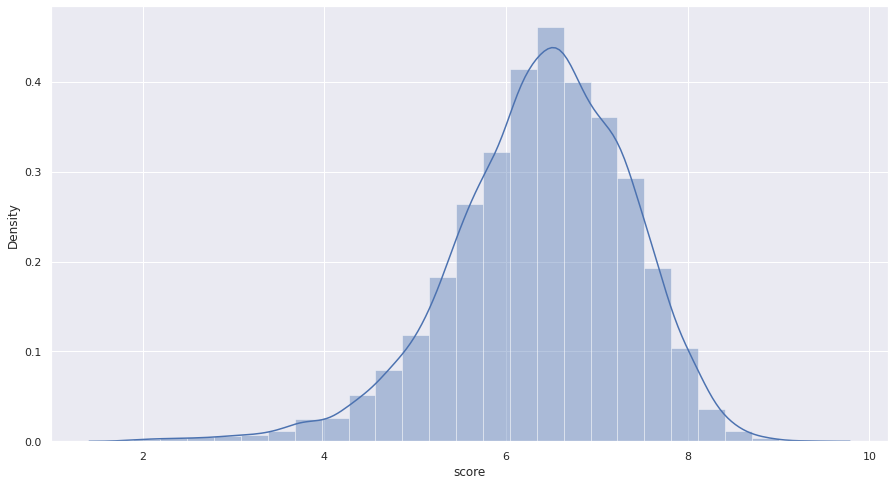

In [8]:
# set figure size for seaborn plots
sns.set(rc = {'figure.figsize':(15,8)})
# view distribution of score (target)
score_dist = sns.distplot(movies['score'], bins=25)

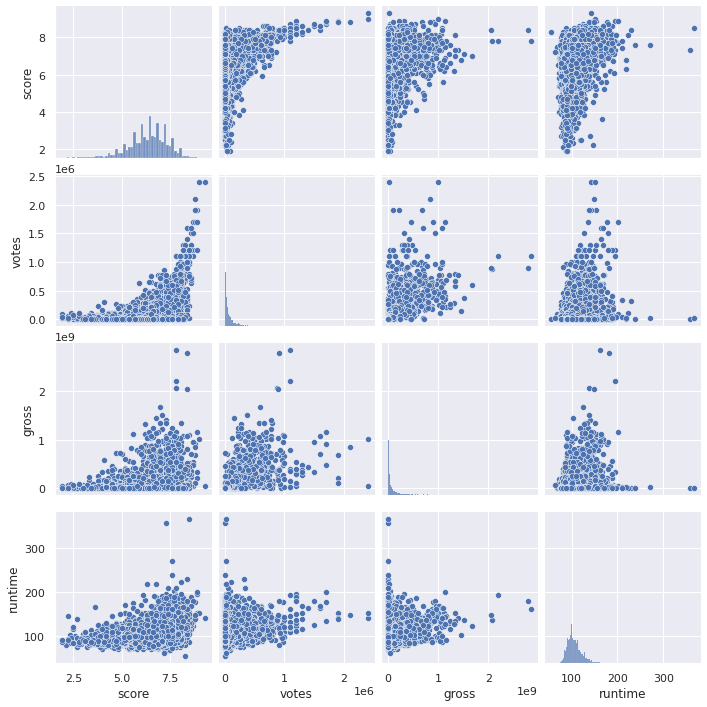

In [9]:
# Perform pair plotting:
sns.pairplot(data=movies)

Observations:
- As expected, the probability distribution of the scores is a gaussian curve centered around 6.3. Movies generally have scores of around 5-8, but a small portion of movies are exceptionally good or bad, as seen from the roll-off of the gaussian curve.
- The score has a weak positive correlation with the number of votes (higher the votes, higher the score). Though this is not always true, as seen by the large cluster under the imaginary "curve".
- The relation between score and runtime/gross revenue is very weakly positive, forming a large cluster with little linearity. 

Implications:
- Weak correlations between target and predictor variables imply that this problem may not lend itself easily to linear regression with any one variable. 
- Multivariable regression using a supervised algorithm may be appropriate. Or using a clustering algorithm.

Are there any exploitable clusters in this data? One candidate relationship is that of score and genre. We can first plot the weakly linear relationship between score and votes, and make the visualization richer by adding a color to represent each genre.

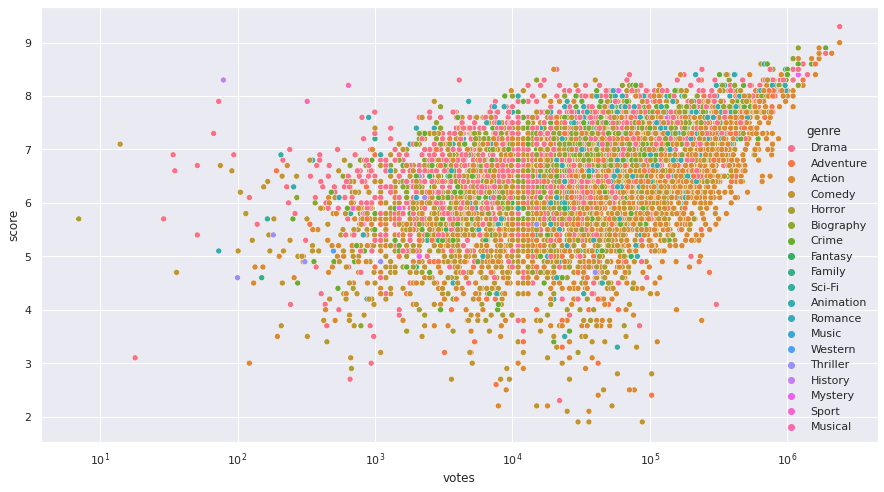

In [14]:
# plot of score vs. votes with genre
scat_gross = sns.scatterplot(x='votes',y='score',hue='genre',data=movies)
scat_gross.set_xscale('log')

This plot better shows the weak positive correlation between the number of votes and average score. The colors represent genre, though no clusters of genre are evident that could be linearly/non-linearly separable. This suggests that there may be an even spread of scores across genres. This can be evaluated using a more direct plot. The lack of clusters precludes us from using an unsupervised clustering algorithm where areas around certain points (clusters) can be linearly, or by means of a hyperplane, separated to form classes, or averaged over to provide a continuous value for regression.

Let us analyze the impact of genres on movie popularity and quality using a bar plot. Intuitively, score could be a useful proxy for movie quality and gross-revenue for popularity.

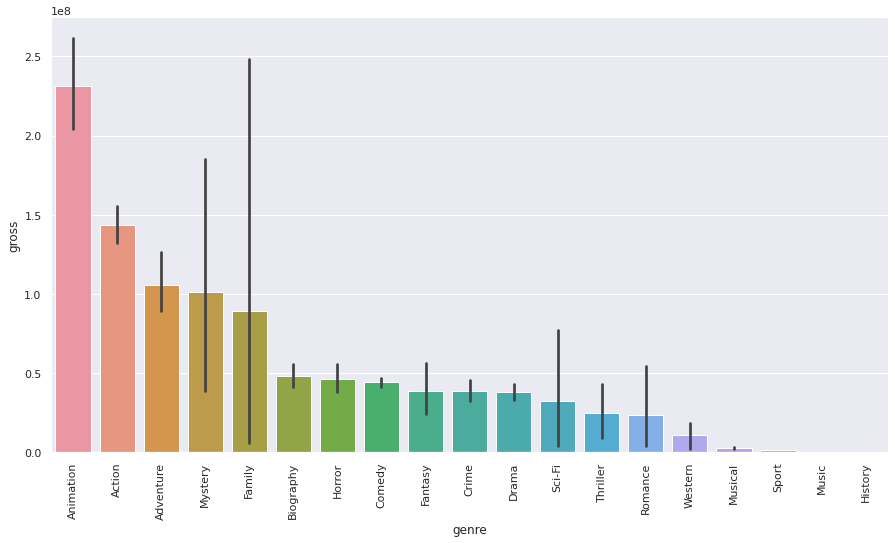

In [15]:
# This plot describes the average gross revenue by genre.

plot_data = movies.groupby('genre')['gross'].mean().sort_values(ascending=False)

scat_gross = sns.barplot(x='genre',y='gross',data=movies, order=plot_data.index)
scat_gross.set_xticklabels(scat_gross.get_xticklabels(),rotation=90);

It is seen that animation is the highest grossing genre followed by action,  adventure and mystery. This is corroborated by the existence of animation giants like Disney, Pixar and Dreamworks in the film industry. There is a large variance, as seen by the thin, black line, for family and mystery movies, which may be indicative of varying movie popularity in these two genres.  

Does this trend also manifest itself in the quality/score?

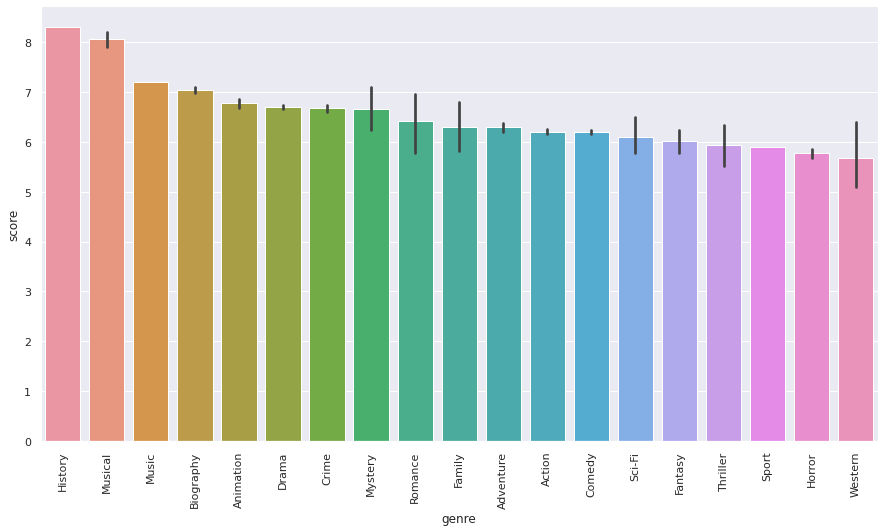

In [16]:
# A plot of score vs genre

plot_data = movies.groupby('genre')['score'].mean().sort_values(ascending=False)

bar_genre = sns.barplot(x='genre', y= 'score', data=movies, order=plot_data.index)
bar_genre.set_xticklabels(labels=bar_genre.get_xticklabels(), rotation=90);

This plot shows a relatively uniform average score by genre where most genres
scored between 5.5 and 7. Surprisingly, historical movies are considerably
better than other genres, followed closely by musicals.
Following from the previous visualization, the family genre has an average rating of around 6.2. However, there is low variation in this data, suggesting that genre alone may not be the leading cause for high gross revenue.

This naturally made me think about the correlation between genre and age rating. Animated movies are for all, while horror movies are for older audiences. It is also worth considering the relationship between score and rating. 

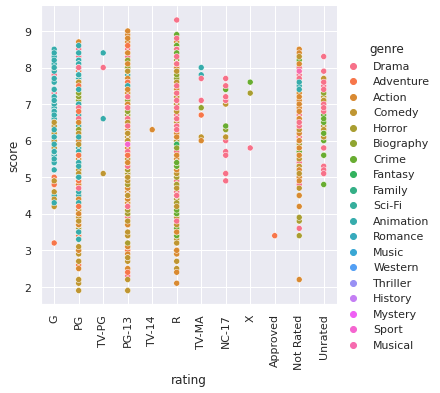

In [17]:
# plotting rating vs score (with spread of genre)
rating_order = ['G', 'PG', 'TV-PG', 'PG-13','TV-14', 'R','TV-MA','NC-17','X',
                'Approved','Not Rated','Unrated']
movies["rating"] = pd.Categorical(movies["rating"], rating_order)
rel_genre = sns.relplot(x= 'rating', y= 'score', hue='genre', data=movies)
rel_genre.set_xticklabels(rotation=90)


This plot reveals that there is a wide variance in score by rating category. Rating is likely not a great indicator of score if a regression algorithm is used, given the spread of the data.

There is also a need to clean the data so that related categories can be clubbed together (G, PG and TV-PG for example), and missing, or unrated categories are removed.

Now let's look at the correlation between rating and genre.

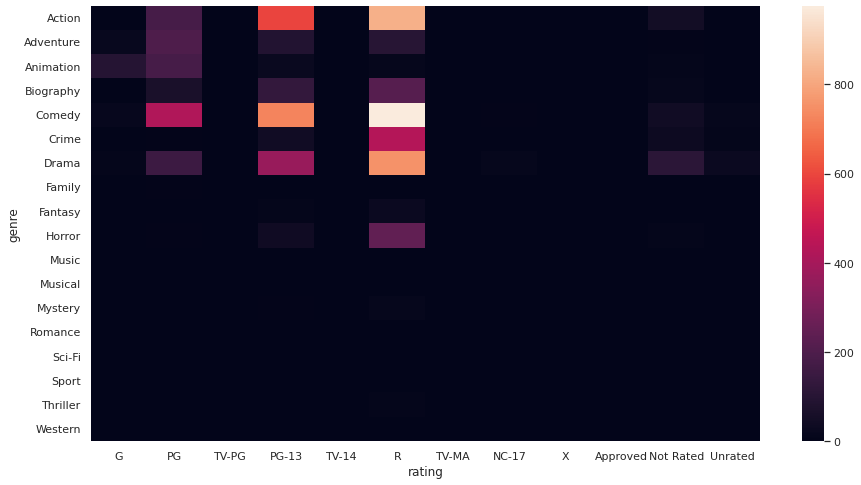

In [18]:
# correlation between genre and rating
sns.heatmap(pd.crosstab(movies.genre, movies.rating))

This plot shows the cross-correlation between genres and ratings. Correlation is the extent to which certain genres are more likely
associated with a certain rating. For instance, animation, which is targeted
at children has a PG or G rating while many action, or comedy movies are largely PG-13 to R rated.

I initially expected fewer R rated movies than PG movies but this doesn't seem to be the case. While the children's movie industry is profitable, perhaps targeting adult audiences is more profitable to production studios. 

The clear correlations between rating and genre may be useful in predicting score, as a result.

Finally, let's consider how movies are spread across nations, and, by proxy, language. Does the data favor a few nations over others? Spoiler alert: Probably. 

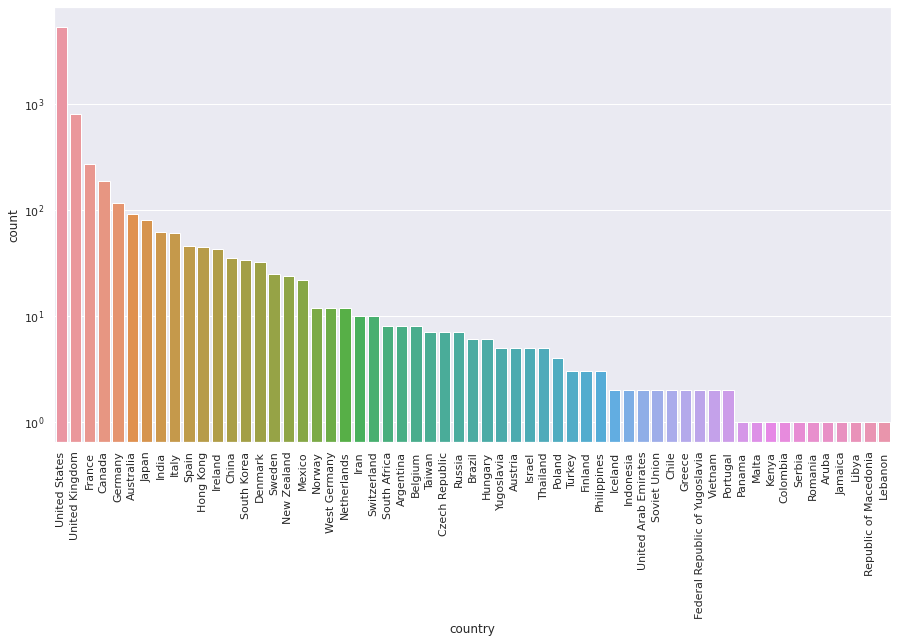

In [19]:
# Data distribution by country in the dataset

country_dist = sns.countplot(x = 'country',
                             data = movies,
                             order = movies['country'].value_counts().index
               )
country_dist.set_yscale('log')
country_dist.set_xticklabels(country_dist.get_xticklabels(), rotation=90);

This is a plot of the number of movies produced by nation. According to this data, the United States produces the most, followed by the UK, France, and Canada. This may not align with actual movie production by country, and may just be the choice of the statistician collecting this data. Furthermore, countries like India, Thailand, and others are likely to be producing movies in regional languages, not just English. 

Consequently, a good predictor would take cultural differences and taste into account. This is difficult to do without sentiment analysis, a subset of natural language processing. Since this dataset is limited, but favors English movies (as seen from the large number of US-UK movies), I will restrict my data to english language films. This does not restrict movies from other nations but probably cuts down many movies from non-english speaking countries.

To do the above, I will need an additional dataset with metadata.

#### Data Cleaning and Feature Engineering Plan: 


<u>Data Cleaning Steps Noted During EDA:</u>

It was noted that:
* The year column had inaccurate data
* 30% of the budget column contained null values
* Some highly reviewed films were missing budget, gross revenue and year data.
* The company feature is also to be dropped as one company, especially a large one, can produce a variety of films, which makes it a noisy predictor of score.
* On the other hand, a composite of rating and genre accounted for differences in score. 
* The data contains movies from multiple countries, in various languages, but is biased towards English movies. To maximize prediction quality, it would make sense to restrict data to English language movies only. 

<u>To remedy these challenges and those mentioned in the "Data" section, we do the following:</u>
* Based on EDA, and by heuristic (director and star), relevant columns need to be selected:
  * Rating
  * Genre
  * Director
  * Star
  * Score
* Many features are categorical, needing encoding, like genre, rating, director and star.
* We can restrict the dataset to English movies only to maximize the prediction quality. The existing dataset (movies.csv) can be augmented with the IMDb movie-language metadata dataset (https://datasets.imdbws.com/title.akas.tsv.gz), which associates a movie with its language. These datasets can then be merged on rows where language = english. 
* Drop "not rated", "approved", "unrated movies"
* Group (TV14, PG13), (R, TV-MA), (NC17, X) together
* Check for and drop NaNs, blanks, duplicates
* Write dataframe to a file for easier file loading in later steps

<u>Feature Engineering: </u>

The raw data for this problem came from a Kaggle dataset containing multilingual and multiregional movie metadata including the IMDb score (predicted value). The data contained numerical and non-numerical features. The following is a summary of the feature engineering performed on each column and why:
* Rating - rating is a set of categories that is ordinal (follows an order). To encode this numerically, label encoding is most suitable. Therefore, the MPA ratings ('G', 'PG', 'PG-13', 'R', NC-17') were encoded from [0-4].
* Genre - there are 18 genres which are nominal (no order). These were encoded in binary, which is similar to one-hot encoding, except it creates n-1 columns while one-hot encoding creates n columns to encode data.
* Director - there are more than 2.7k unique directors in this dataset. Using binary/one-hot encoding would increase the dimensionality dramatically. I did not want to reduce the number of directors to the top 100 directors, for example, so I resorted to label encoding. However, since label encoding introduces an ordering (0 < 1 < 2, etc.), I first sorted the directors by their highest mean IMDb score, and then performed label encoding. Therefore, the ordering that is introduced carries some meaning.
* Star - there are more than 2.5k unique stars. Similar to the encoding used for the directors, the stars were ranked by highest mean IMDb score and then label encoded.


Below, the code is shown for the data cleaning and feature engineering steps discussed above. The data cleaning (which involves augmenting and merging the main dataset with an additional IMDb metadata dataset on english language movies) has been commented out as it is memory intensive. Instead, the file that was produced as its output has been saved as "movies_en.csv", which has been loaded in the next step.


In [ ]:
"""Data Cleaning"""
# # 1. Loading Datasets
# # Load the movies dataset
# movies_raw_df = pd.read_csv('movies.csv')
# # Load the movie-language metadata dataset 'title.akas.tsv.gz'
# title_df = pd.read_csv('title.akas.tsv.gz', sep='\t')

# # 2. Find English Movies and Drop Duplicates
# # Select a column subset of title_df
# title_sub_df = title_df[['title','language']]
# # Get a series of english movie titles
# title_en_df = title_sub_df.loc[title_sub_df['language']=='en']
# # Drop duplicates
# title_en_nodup_df = title_en_df.drop_duplicates(subset='title',keep='first')

# # 3. Keep relevant columns
# movies_rel_df = movies_raw_df.drop(['year','released','votes','writer','country','budget','gross','company','runtime'], axis=1)
# # Rearrange and rename columns before merge
# movies_df = movies_rel_df[['name','rating','genre','director','star','score']]
# movies_df.columns = ['title','rating','genre','director','star','score']

# # 4. Merge the two datasets on English movies
# movies_df = pd.merge(movies_df, title_en_nodup_df, how = "inner", on='title')

# # 5. Check for NaNs
# np.where(pd.isnull(movies_df['score']))
# # Check for blanks
# np.where(movies_df.applymap(lambda x: x == ''))

# # 6. Write movies_df to a file for reading later
# movies_df.to_csv('movies_en.csv', columns = ['title','rating','genre','director','star','score'], header=['title','rating','genre','director','star','score'], index=False)

'Data Pre-processing'

I define some useful helper functions that simplify testing individual movies at the model evaluation stage. This is defined here as they need to be called when the data is first cleaned (e.g., to save the final list of directors/stars).

In [20]:
def SaveDict(fname, dictname):
    """
    Saves a Python dictionary to a .txt file.
    """
    with open(fname,"w") as f:
        f.write(json.dumps(dictname))

def LoadDict(fname):
    """
    Loads a Python dictionary from .txt file.
    """
    with open(fname) as f:
        data = f.read()

    new_dict = json.loads(data)

    return new_dict


# Director Encoder
def DirectorEncoder(director, director_dict):
    """
    Returns the respective ID of a given director  
    """
    return director_dict[director]

# Star Encoder
def StarEncoder(star, star_dict):
    """
    Returns the respective ID of a given star  
    """
    return star_dict[star]

# Genre Encoder
def GenreEncoder(genre):
    genre_list = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
                  'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music',
                  'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller' 'Western']
    genreEncoded = np.zeros(17,)
    genreEncoded[genre_list.index(genre)] = 1
    
    return genreEncoded 

# Rating Encoder
def RatingEncoder(rating):
    ratings_map = {'G':'G', 'PG':'PG', 'TV-PG':'PG', 'PG-13':'PG-13','TV-14':'PG-13', 'R':'R','TV-MA':'R', 'NC-17':'NC-17','X':'NC-17'}
    ratings_2_label = {'G': 0, 'PG': 1, 'PG-13': 2, 'R': 3, 'NC-17': 4} 
    
    return ratings_2_label[ratings_map[rating]]

In [22]:
def TestMovie(title, rating, director, star, genre, score):
    X_val = []
    y_val = score

    director_dict = LoadDict('director.txt')
    star_dict = LoadDict('star.txt')

    try:
        X_val.append(RatingEncoder(rating))
    except KeyError:
        print("Rating not found")

    try:
        X_val.append(DirectorEncoder(director, director_dict))
    except KeyError:
        print("Director not found")
    
    try:
        X_val.append(StarEncoder(star, star_dict))
    except KeyError:
        print("Star not found")
    
    try:
        X_val = np.concatenate((X_val, GenreEncoder(genre)), axis=0).reshape(1,-1).astype('float32')
    except ValueError:
        print("Genre not found")
    
    # Neural Network prediction
    y_val_pred_NN =  model.predict(X_val, verbose=0)[0][0]
    NN_E = (y_val_pred_NN - y_val)

    # RF prediction
    y_val_pred_RF = regressor_opt.predict(X_val)[0]
    RF_E = (y_val_pred_RF - y_val)

    # SVR prediction
    y_val_pred_SVR = SVRModel.predict(X_val)[0]
    SVR_E = (y_val_pred_SVR - y_val)


    # Print output
    resultTable_data = [
        ['Actual score', score, 0.0],
        ['Neural Network', y_val_pred_NN, NN_E],
        ['Random Forest', y_val_pred_RF, RF_E],
        ['Support Vector Regression', y_val_pred_SVR, SVR_E]
    ]
    resultTable_header = ['Model','Score (out of 10)','Absolute Error']

    print("Movie Title: ", title)
    print(tabulate(resultTable_data, headers=resultTable_header, tablefmt='fancy_grid', floatfmt = '.1f'))

In [21]:
# Feature Engineering 
def CleanData():
    """
    1. Reads in movies_en.csv
    2. Retains only necessary features
    3. Encodes features by label encoding or multibitbinarizer
    4. Outputs pandas df called movies_Xy_df
    """
    # Read movies_df csv file
    movies_df = pd.read_csv('movies_en.csv')

    # Rating - label encoding
    # Drop any ratings that do not correspond to Motion Picture Association (MPA) rating standards
    movies_df = movies_df.drop(movies_df[movies_df['rating'].isin(['Approved', 'Not Rated', 'Unrated'])].index, axis=0)
    movies_df = movies_df.dropna().reset_index()
    # Group similar ratings together as per MPA conventions
    rating_dict = {'G':'G', 'PG':'PG', 'TV-PG':'PG', 'PG-13':'PG-13','TV-14':'PG-13', 'R':'R','TV-MA':'R', 'NC-17':'NC-17','X':'NC-17'}
    movies_df['rating'] = movies_df['rating'].map(rating_dict)
    movies_df['rating'] = pd.Categorical(movies_df['rating'], ['G', 'PG', 'PG-13', 'R', 'NC-17'])
    # Perform label encoding
    rating_encoded_list, rating_decoded_list = movies_df['rating'].factorize(sort=True)
    rating_encoded = pd.Series(rating_encoded_list, name='rating')

    # Director - label encoding
    # Group by directors, find mean IMDb score and sort high-to-low
    director_df = movies_df.groupby(movies_df['director']).aggregate({'score':'mean'}).reset_index()
    director_df = director_df.sort_values(by='score', ascending = False).reset_index(drop=True)
    # Create forward and inverse label-encoded dictionary of directors
    director_dict = director_df['director'].to_dict()
    director_dict_inv = {v:k for k, v in director_dict.items()}
    # Create a pandas series where director names are mapped to numeric values
    director_encoded = movies_df['director'].map(director_dict_inv)
    # Write inverse director dictionary to file
    SaveDict("director.txt", director_dict_inv)

    # Star - label encoding
    # Group by stars, find mean IMDb score and sort high-to-low
    star_df = movies_df.groupby(movies_df['star']).aggregate({'score':'mean'}).reset_index()
    star_df = star_df.sort_values(by='score', ascending = False).reset_index(drop=True)
    # Create forward and inverse label-encoded dictionary of stars
    star_dict = star_df['star'].to_dict()
    star_dict_inv = {v:k for k, v in star_dict.items()}
    # Create a pandas series where star names are mapped to numeric values
    star_encoded = movies_df['star'].map(star_dict_inv)
    # Write inverse director dictionary to file
    SaveDict("star.txt", star_dict_inv)

    # Genre - MultiLabelBinarizer Encoding
    mlb = MultiLabelBinarizer()
    genre_encoded = mlb.fit_transform(movies_df['genre'].to_numpy().reshape(-1,1))
    genre_encoded = pd.DataFrame(genre_encoded, columns = mlb.classes_)

    # Build encoded dataframe
    movies_Xy_df = pd.concat([rating_encoded, director_encoded, star_encoded, genre_encoded, movies_df['score']], axis=1).dropna()
    # Save Xy dataframe to file
    # movies_Xy_df.to_csv("movies_xy.csv", header = True)

    return movies_Xy_df

#### Model Design


<u>Analysis Approach:</u>

The dataset and nature of this problem allow for a supervised learning (regression) approach. It is appropriate as there are 4 predictor variables (rating, genre, director, star) and the continuous response variable (score). 

The approach to building a supervised learning regression model would be to first perform any required feature engineering on the dataset, split it into an input dataset (X) and output dataset (y). This dataset is segmented in a 70%-30% training-testing split using the sci-kit learn library. An appropriate supervised ML algorithm can be trained on this data to produce a prediction. 

However, like many machine learning models, these need to be tuned to improve their performance. Each ML paradigm discussed above has its own hyperparameters to tune. This will be covered in the next section "Hyperparameter Optimization".

Finally we can compare this predicted result with the actual test results to evaluate algorithm performance and perform any tuning if necessary.


<u> Model Selection: </u>

As discussed in the "Related Works" section, random forests, support vector machines for regression (SVR) and multilayer perceptron neural networks (NN) are three candidate models. Given the flexibility and depth possessed by the neural network paradigm, it was chosen as the primary method. This model will be compared against random forests and SVR.


<u> Model Evaluation: </u>

Once a model has been fit on training data (X_train, y_train), the skill, or quality, of the trained model can be found by first processing the validation data (X_test) through the model, and comparing this with the actual target values (y_test). The metric of choice is the mean-squared-error (MSE). Its square root, the Root-Mean-Squared-Error (RMSE) is also useful to analyze since this error is in the same units as the target variable (i.e. score out of ten points). 

In this section, a helper function is defined for the training and testing dataset split. This will be used in later sections

In [23]:
# Define train-test split function
def GetTrainTest(movie_df, percent_split=0.7):
    """
    1. Takes in movie data as pandas dataframe
    2. Splits target and feature columns
    3. Returns train, test splits using sklearn's train_test_split method to
        specified percent_split ratio (default = 0.7)
      
    Recommended pre-req function call to get movie_df: CleanData()
    """
    # Define X and y
    movies_X = movie_df.iloc[:,:-1].reset_index(drop = True)
    movies_y = movie_df['score'].reset_index(drop = True)

    # Train test split
    return train_test_split(movies_X, movies_y, train_size = percent_split, random_state=0)

#### Model Implementation and Hyperparameter Optimization

In [24]:
# Data preparation for model training
# This will be used for all three models

# Fix random number seed to get repeatable values
seed(1)

# Clean data
movies_Xy_df = CleanData()

# Get train, test split
X_train, X_test, y_train, y_test = GetTrainTest(movies_Xy_df, 0.7)

#### Neural Network Model

Hyperparameters to tune:
1. Depth - number of layers including the output layer
2. Width - number of neurons per hidden layer
3. Learning Rate - rate at which model adapts to new data

In the example below, the depth is 3, width is 3 neurons.

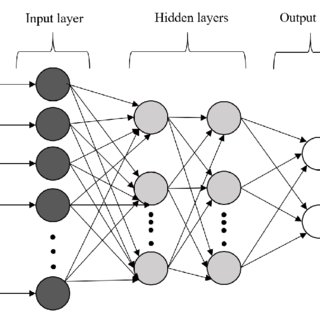

Source: https://www.researchgate.net/figure/Illustration-of-neural-network-architecture_fig2_363717459


In this hyperparameter optimization exercise, there are some notable constants:
- Number of input neurons: 20
- Activation function = Rectified linear unit is recommended for modern multilayer perceptron models (Pg. 174, Deep Learning, 2016)
- Batch size = 128
- Epochs = 100

First, since a NN has a configurable architecture, we define a scaffold method to create a NN of any given dimensions. Next, we define a function to find the best choice for each of the hyperparameters (depth, width and learning rate) and also record the results of varying choices of hyperparameters for analysis. 

In [25]:
# Hyperparameter tuning functions for neural networks

# Create a prescribed MLP Neural Network model
def create_nn_model(depth, width, learning_rate):
    """
    Takes specifications for neural network architecture and learning rate
    and compiles a Keras neural network model using mean-squared-error
    as the loss function.
    """
    # create first hidden layer
    model = Sequential()
    model.add(Dense(width, input_shape=(20,), activation='relu'))
    
    # create n_layers-1 number of hidden layers
    for i in range(depth-1):
        name = 'layer_dense_{0}'.format(i+2)
        model.add(Dense(width, 
                     activation='relu',
                     name = name
        ))

    # create output layer
    model.add(Dense(1, activation='linear'))
    
    # set optimizer, enable gradient clipping to avoid gradient explosion
    opt = Adam(lr = learning_rate, clipnorm = 1.0)

    # compile model
    model.compile(loss='mean_squared_error', 
                  optimizer=opt, 
                  metrics=['mse']
    )
    
    return model

# Tuning number of layers (depth)
"""
Args:
Depth = list of depths to try
Width = Number of dense neurons per layer (width)
Learning Rate

Output:
best parameter using argmin (mse) for all tested width values AND
training data (loss, val_loss for each parameter variation)
"""
def FindBestDepth(depth_list, width, learning_rate, X_train, y_train, X_test, y_test, verbose=1):
    # Init empty results dict and list
    results_dict = {}
    mse = []
    
    # Loop through depths, create and fit NN models
    for n_layers in depth_list:
        mdl = create_nn_model(n_layers, width, learning_rate)
        history = mdl.fit(X_train, y_train,
                          validation_data = (X_test, y_test),
                          batch_size = 128, 
                          epochs = 100, 
                          verbose = 0,
                  )
        # Calculate train and test MSE, print the values
        train_mse = mdl.evaluate(X_train, y_train, verbose = 0)[1]
        test_mse = mdl.evaluate(X_test, y_test, verbose = 0)[1]
        if verbose:
            print('Train MSE: %.3f, Test MSE: %.3f' %(train_mse, test_mse))

        # Save results
        mse.append(test_mse)
        name = '{}'.format(n_layers)
        results_dict[name] = (history.history['loss'], history.history['val_loss'])

        best = np.argmin(mse)

    return depth_list[best], results_dict


# Tuning number of neurons (width)
"""
Args:
Depth = Use best depth
Width = List of dense neurons per layer (width)
Learning Rate

Output:
best parameter using argmin (mse) for all tested width values AND
training data (loss, val_loss for each parameter variation)
"""
def FindBestWidth(depth, width_list, learning_rate, X_train, y_train, X_test, y_test, verbose=1):
    # Init empty results dict and list
    results_dict = {}
    mse = []
    
    # Loop through depths, create and fit NN models
    for n_neurons in width_list:
        mdl = create_nn_model(depth, n_neurons, learning_rate)
        history = mdl.fit(X_train, y_train,
                          validation_data = (X_test, y_test),
                          batch_size = 128, 
                          epochs = 100, 
                          verbose = 0,
                  )
        # Calculate train and test MSE, print the values
        train_mse = mdl.evaluate(X_train, y_train, verbose = 0)[1]
        test_mse = mdl.evaluate(X_test, y_test, verbose = 0)[1]
        if verbose:
            print('Train MSE: %.3f, Test MSE: %.3f' %(train_mse, test_mse))

        # Save results
        mse.append(test_mse)
        name = '{}'.format(n_neurons)
        results_dict[name] = (history.history['loss'], history.history['val_loss'])

        best = np.argmin(mse)

    return width_list[best], results_dict


# Tuning learning rate
"""
Args:
Depth = Use best depth
Width = Use best width
Learning Rate = list of learning rates

Output:
argmin (mse) for all tested learning rate values AND
training data (loss, val_loss for each parameter variation)
"""
def FindBestLR(depth, width, learning_rate_list, X_train, y_train, X_test, y_test, verbose = 1):
    # Init empty results dict and list
    results_dict = {}
    mse = []
    
    # Loop through depths, create and fit NN models
    for lr in learning_rate_list:
        mdl = create_nn_model(depth, width, lr)
        history = mdl.fit(X_train, y_train,
                          validation_data = (X_test, y_test),
                          batch_size = 128, 
                          epochs = 100, 
                          verbose = 0,
                  )
        # Calculate train and test MSE, print the values
        train_mse = mdl.evaluate(X_train, y_train, verbose = 0)[1]
        test_mse = mdl.evaluate(X_test, y_test, verbose = 0)[1]
        if verbose:
            print('Train MSE: %.3f, Test MSE: %.3f' %(train_mse, test_mse))

        # Save results
        mse.append(test_mse)
        name = '{}'.format(lr)
        results_dict[name] = (history.history['loss'], history.history['val_loss'])

        best = np.argmin(mse)

    return learning_rate_list[best], results_dict

In [26]:
# Test-bed for finding optimal model hyperparameters
"""
This code cell is to run FindBestDepth(), FindBestWidth(), FindBestLR()
methods with custom parameter options, stored in a list.
It allows for rapid prototyping and outputs a Train and Test Mean Squared Error
score to observe performance evolution over various hyperparameter choices.
"""

# Set list of hyperparameters to test
Depth_list = [13, 14, 15]
Width_list = [256, 512, 1024]
LR_list = [9e-3, 8e-3, 7e-3, 6e-3, 5e-3, 4e-3, 3e-3, 2e-3, 1e-3]

# Find best depth
#_, results_depth = FindBestDepth(Depth_list, Width_list[0], LR_list[0], X_train, y_train, X_test, y_test)
# Find best width
#_, results_width = FindBestWidth(13, Width_list, LR_list[0], X_train, y_train, X_test, y_test)
# # Find best lr
#_, _ = FindBestLR(13, 16, LR_list, X_train, y_train, X_test, y_test)
#print("done")

The above code cell used for running tests has been commented out after the optimal parameters had been found by testing various hyperparameter combinations in batches. Since this process was memory intensive and took up lots of space on the notebook, it is not displayed in its raw form. The results of batch testing are discussed in the following analysis.

To illustrate the effect of varying hyperparameter values, we can sample some hyperparameters and observe their overall validation loss relative to one another. We consider the ranges:
1. Depth = [7, 13, 19]
2. Width = [8, 16, 32]
3. Learning Rate = [1e-2, 1e-3, 1e-4]

To observe only the changes to the hyperparameter of interest, all other hyper
-parameters are set to their respective, optimal values:
1. Depth = 13
2. Width = 28
3. Learning Rate = 3e-3

In [27]:
# Analysis of hyperparameter tuning
# Set testing hyperparameters
depth_test = [7, 13, 19]
width_test = [8, 16, 32]
lr_test = [1e-2, 1e-3, 1e-4]

depth_def = 13
width_def = 28
lr_def = 3e-3

# Get results from FindBest<>() methods
# Use verbose=0 if you do not want to print MSE output
# Depth
_, results_depth = FindBestDepth(depth_test, width_def, lr_def, X_train, y_train, X_test, y_test)
# Width
_, results_width = FindBestWidth(depth_def, width_test, lr_def, X_train, y_train, X_test, y_test)
# Learning Rate
_, results_lr = FindBestLR(depth_def, width_def, lr_test, X_train, y_train, X_test, y_test)

print("done")

Train MSE: 0.253, Test MSE: 0.281
Train MSE: 0.281, Test MSE: 0.299
Train MSE: 0.259, Test MSE: 0.285
Train MSE: 0.261, Test MSE: 0.284
Train MSE: 0.280, Test MSE: 0.316
Train MSE: 0.283, Test MSE: 0.304
Train MSE: 0.258, Test MSE: 0.283
Train MSE: 0.269, Test MSE: 0.305
Train MSE: 0.489, Test MSE: 0.504
done


In [28]:
# Plotting hyperparameter optimization results
def PlotResults(results, hp=''):
    """
    Plots the Validation Loss over Epochs for Varying Hyperparameters
    in a log scale.
    """
    sns.set(rc = {'figure.figsize':(8,5)})

    if hp == 'depth':
        title_text = 'Validation Loss vs. MSE with Varying Layers'
        legend_text = 'Layers: '
    elif hp == 'width':
        title_text = 'Validation Loss vs. MSE with Varying Neurons per Layer'
        legend_text = 'Neurons: '
    elif hp == 'lr':
        title_text = 'Validation Loss vs. MSE with Varying Learning Rate'
        legend_text = 'LR: '
    else:
        title_text = 'Loss vs. MSE'
        legend_text = ''

    for k in results.keys():
        loss = results[k][0]
        val_loss = results[k][1]
        if hp == '':
            plt.plot(loss, label='Loss')
            k = 'Validation Loss'

        plt.plot(val_loss, label=legend_text+k)

    plt.title(title_text)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.yscale("log")
    plt.legend()
    plt.show()

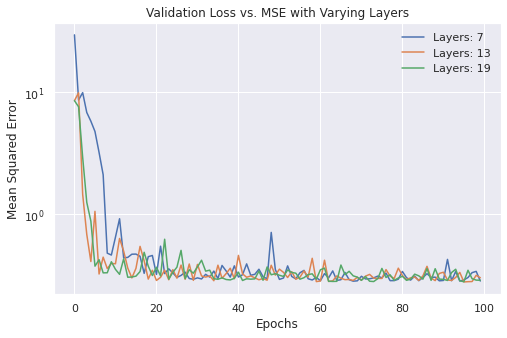

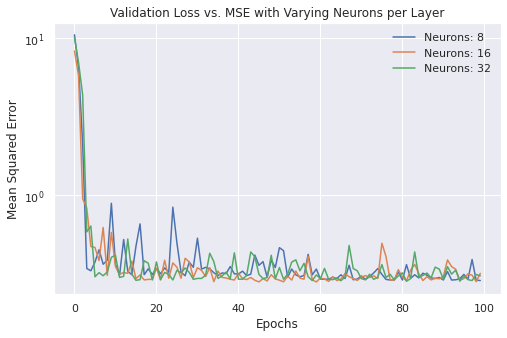

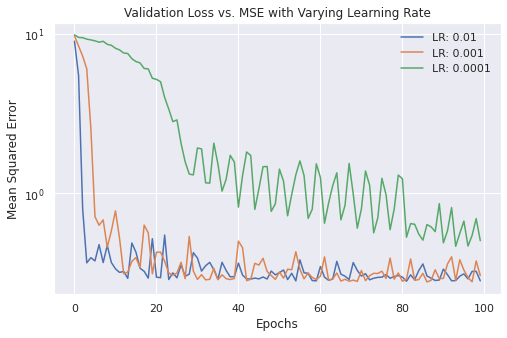

In [29]:
# Depth
PlotResults(results_depth, hp='depth')
# Width
PlotResults(results_width, hp='width')
# Learning Rate
PlotResults(results_lr, hp='lr')

<u>Analysis</u>

The plots above describe the relative changes in validation loss over epochs for a finite number of hyperparameter configurations. 

1. Depth:

  The validation loss falls most rapidly for the 13-layer model, followed by that of 19 and that of 7. The 7 layer model exhibits more spikes (large MSE) over epochs. A similar trend is observed in the 19-layer model, which, despite its initial descent, does not converge as fast to a low error. The 13-layer model appears to be the best of both high and low number of layer models - it has a fast convergence and is stable.

2. Width:

  The speed of convergence was comparable in all three configurations. In terms of stability, the 16 neuron model exhibits better stability with time, despite some oscillations. This is followed by the 32-neuron-width model and that of 8 neurons, which had lots of oscillation in validation loss over time. 

  Wider neural networks produce more predictable behavior as the contributions of each neuron increasingly spread out over many neurons. This could account for its stability. Perhaps due to simpler outputs from multiple neurons, the number of epochs to achieve lower error (i.e., speed of convergence) is also faster.

3. Learning Rate:

  A learning rate of 0.01 was seen to converge the fastest, followed by 0.001 and 0.0001. As the learning rate decreases, the model becomes less amenable to new inputs, thus changing very slowly over epochs. Both the 0.01 and 0.001 learning rate models converged within 100 epochs and the 0.01 model notably had a good convergence with low oscillation. As the epoch count approached 100, the 0.01 and 0.001 models had comparable performance.

<u>What hyperparameter configuration is optimal?</u>

While the above plots and analysis covered only 3 configuations of each, intensive testing was performed in much greater detail. In each test, the MSE for a given hyperparameter was recorded and the hyperparameter values were doubled:

e.g. `[2, 4, 8, 16, 32, ...]`

When significant degradation was observed, granular steps were taken between two known hyperparameter values. Thus, you may note that there is some uneven granularity in the test cases performed (e.g. between 13-16 in depth or in the order of 1e-3 in learning rate). 

Below are the values that were tested:

`Depth_list = [2, 4, 8, 9, 11, 13, 14, 15, 16, 32, 64]`

`Width_list = [4, 8, 12, 16, 20, 28, 32, 64, 128, 256, 512]`

`LR_list = [1e-1, 1e-2, 9e-3, 8e-3, 7e-3, 6e-3, 5e-3, 4e-3, 3e-3, 2e-3 1e-3, 1e-4, 1e-5, 1e-6]`

It is worth noting that neural network skill is a stochastic process and there can be variations in MSE between tests. As a result, hyperparameter values at boundaries where performance significantly changed were not used, in favor of more robust choices where MSE performance was stable.

e.g. For Depth, an improvement of ~70% was observed at n=8, followed by relatively minor improvements until n=32 where a 7% improvement was observed. Using the method above, selecting either 8 or 32, boundary values, is riskier than selecting 13, which had the overall lowest score, but was also comparable to its neighboring values. 

`2: Train MSE: 3.884, Test MSE: 3.885`

`4: Train MSE: 1.062, Test MSE: 1.077`

`8: Train MSE: 0.285, Test MSE: 0.306`

`9: Train MSE: 0.275, Test MSE: 0.308`

`11: Train MSE: 0.273, Test MSE: 0.305`

`13: Train MSE: 0.252, Test MSE: 0.281`

`14: Train MSE: 0.256, Test MSE: 0.286`

`15: Train MSE: 0.300, Test MSE: 0.318`

`16: Train MSE: 0.286, Test MSE: 0.308`

`32: Train MSE: 0.263, Test MSE: 0.285`

`64: Train MSE: 0.266, Test MSE: 0.294`

This method followed for both width and learning rate until the following optimal parameters were found:

Depth: 13 layers
Width: 28 neurons per layer
Learning rate: 0.003

#### Random Forest Model

The random forest model uses two key hyperparameters related to the number of decision trees and sampling subsets used. These are titled "n_est" for number of estimators (i.e. decision trees) and "max_sampling" for the fraction of sampling size used to sample the training data to produce a random decision tree.

Random forest is an ensemble method. An ensemble method is one where an average is taken over multiple observations. Therefore, the number of observations and the randomness of each observation can be increased by increasing the number of decision trees (n_est) and reducing the sample size (max_sampling). This could improve the overall average predicted value as a result.

To evaluate this, a nested for loop can be created with a list of n_est and max_sampling values. The mean-squared error of the random forest with each combination of (n_est, max_sampling) can then be saved in a (4, 4) array.

In [30]:
"""Model Training - Random Forest"""
# Random Forest Model
# Initialize data array
MSE_scores_RF = np.zeros((4,4))
#oob_scores_RF = np.zeros((4,4))

# Train model over various hyperparameter options
for i, n_est in enumerate([50, 100, 200, 300]):
  for j, samp_max in enumerate([0.2, 0.4, 0.6, 0.8]):
    # Define model object
    regressor = RandomForestRegressor(n_estimators = n_est, oob_score = True, random_state = 0, max_samples=samp_max)
    # Train model
    regressor.fit(X_train, y_train)
    # Find prediction and error
    y_pred_RF = regressor.predict(X_test)
    MSE_scores_RF[i, j] = mean_squared_error(y_test, y_pred_RF)
    #oob_scores_RF[i, j] = regressor.oob_score_


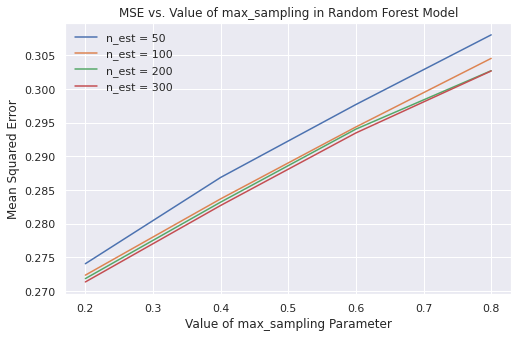

<Figure size 640x480 with 0 Axes>

In [32]:
# Results for Random Forest
x_RF_nest = [50, 100, 200, 300]
x_RF_maxsamp = [0.2, 0.4, 0.6, 0.8]

fig_RF = plt.figure() 
ax_RF = plt.axes()
plt.figure(figsize=(8, 6), dpi=80)


# Plotting MSE vs. n_estimators for various max_sampling values
ax_RF.plot(x_RF_maxsamp, MSE_scores_RF[0, :], label='n_est = 50');
ax_RF.plot(x_RF_maxsamp, MSE_scores_RF[1, :], label='n_est = 100');
ax_RF.plot(x_RF_maxsamp, MSE_scores_RF[2, :], label='n_est = 200');
ax_RF.plot(x_RF_maxsamp, MSE_scores_RF[3, :], label='n_est = 300');
ax_RF.set_title('MSE vs. Value of max_sampling in Random Forest Model')
ax_RF.set_xlabel('Value of max_sampling Parameter')
ax_RF.set_ylabel('Mean Squared Error')
ax_RF.legend()

fig_RF.show()


<u>Plot and Metrics:</u>

The plot shown depicts the MSE over various max_sampling values. Each line corresponds to a discrete number of estimator from [50, 100, 200, 300].

It can be observed that the minimum MSE occurs when max_sampling is minimized (0.2) and n_est is maximized (300). 

It can be inferred that this trend would continue if the values are further decreased/increased, but as seen by the convergence of the lines, there is likely a limit around ~0.272. However, there may be a computational cost ceiling if the max_sampling and n_est hyperparameters are minimized and maximized.

The optimal mean squared error is displayed in a later section as this section contains non-optimized random forest models which may not yield useful information.

#### Support Vector Machine (Regression)

A support vector machine can use various non-linear functions, or kernels, to create a linearly separable hyperplane. This implementation used a "radial basis function" or "rbf kernel". A radial-basis function can be thought of as a gaussian distribution in the nth dimension.

The hyperparameters that can be tuned in the RBF-based SVR model are:
1. gamma - inverse of variance of radial basis function
2. C - regularization factor

Intuitively, a low gamma value indicates that the variance of the radial-basis fuction is higher, meaning each training data point has a wider influence on the model. C, a regularization parameter, forms a tradeoff between the size of the margin of the support vectors and level of fitting of training data points. 

To optimize these hyperparameters, I used a range of values ranging from 1e-2 to 100 for both. Next, by evaluating the testing MSE for each combination using a colored grid plot we can evaluate the combination that achieves the least MSE at low computational cost.

In [33]:
# Support Vector Machine Regression (SVR)
train_mse = []
test_mse = []

for g in [0.001, 0.01, 0.1, 1, 10, 100]:
  for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    # Model training
    SVRModel = SVR(kernel = 'rbf', gamma = g, C = c)
    SVRModel.fit(X_train, y_train)

    # SVR Evaluation
    # Training data
    y_pred_SVR = SVRModel.predict(X_train)
    SVR_results = mean_squared_error(y_train, y_pred_SVR)
    train_mse.append(SVR_results)

    # Testing data
    y_pred_SVR = SVRModel.predict(X_test)
    SVR_results = mean_squared_error(y_test, y_pred_SVR)
    test_mse.append(SVR_results)


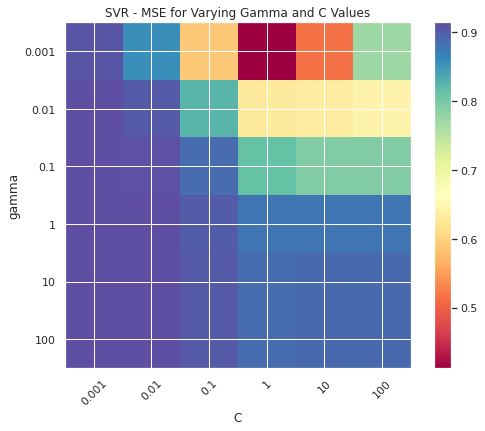

In [34]:
scores = test_mse
scores = np.array(scores).reshape(6, 6)

# Make a nice figure
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Spectral)
plt.xlabel('C')
plt.ylabel('gamma')
plt.colorbar()
plt.xticks(np.arange(6), [0.001, 0.01, 0.1, 1, 10, 100], rotation=45)
plt.yticks(np.arange(6), [0.001, 0.01, 0.1, 1, 10, 100])
plt.title("SVR - MSE for Varying Gamma and C Values")
plt.show()


From the plot above, we observe that the lowest training MSE occurs at gamma = 0.001 and C = 1. As a reminder, a low gamma value indicates that the variance of the radial-basis fuction is higher, meaning each training data point has a wider influence on the model. C, a regularization parameter, forms a tradeoff between the size of the margin of the support vectors and level of fitting of training data points. Consequently, in this case, 

### Results and Discussion

Now that the optimal hyperparameters for the three models have been found, they can be trained and evaluated. 

To evaluate, each model will compute a prediction for the validation data (X_test), and the resulting prediction will be compared with the true validation target data (y_test) by using the mean-squared-error.

Neural Network:

In [35]:
# Train a hyperparameter-optimized NN model and report results
depth_opt = 13
width_opt = 28
learning_rate_opt = 3e-3

model = create_nn_model(depth_opt, width_opt, learning_rate_opt)

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    batch_size = 128, 
                    epochs = 100, 
                    verbose = 0,
          )

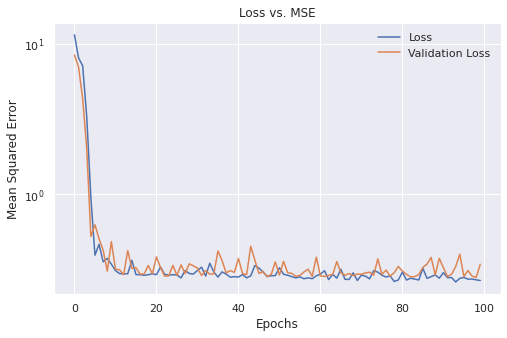

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 28)                588       
                                                                 
 layer_dense_2 (Dense)       (None, 28)                812       
                                                                 
 layer_dense_3 (Dense)       (None, 28)                812       
                                                                 
 layer_dense_4 (Dense)       (None, 28)                812       
                                                                 
 layer_dense_5 (Dense)       (None, 28)                812       
                                                                 
 layer_dense_6 (Dense)       (None, 28)                812       
                                                                 
 layer_dense_7 (Dense)       (None, 28)               

In [36]:
# HP-Optimized NN Model analysis

# Calculate train and test MSE, print the values
trainMSE_NN = model.evaluate(X_train, y_train, verbose = 0)[1]
testMSE_NN = model.evaluate(X_test, y_test, verbose = 0)[1]

# Visualize training and validation loss over time
results_opt = {'total' : (history.history['loss'], history.history['val_loss'])}
PlotResults(results_opt)

# Show NN architecture summary
model.summary()

The validation loss plot over time shows that there was no past epoch that had significantly better error. Hence, the current configuration for epochs is satisfactory. 

Random Forest:

In [37]:
# Set optimal Random Forest parameters
n_est_opt = 300
samp_max_opt = 0.2

# Train model
# Define model object
regressor_opt = RandomForestRegressor(n_estimators = n_est_opt, oob_score = True, random_state = 0, max_samples=samp_max_opt)
# Train model
regressor_opt.fit(X_train, y_train)

# Find prediction and error
y_pred_train = regressor_opt.predict(X_train)
y_pred_test = regressor_opt.predict(X_test)

# Calculate train and test MSE, print the values
trainMSE_RF = mean_squared_error(y_train, y_pred_train)
testMSE_RF = mean_squared_error(y_test, y_pred_test)


Support Vector Regression:

In [38]:
# Training the optimal SVR model

# Model training
SVRModel = SVR(kernel = 'rbf', gamma = 0.001, C = 1)
SVRModel.fit(X_train, y_train)

# SVR Evaluation
# Testing data
y_pred_train = SVRModel.predict(X_train)
y_pred_test = SVRModel.predict(X_test)

# Calculate train and test MSE, print the values
trainMSE_SVR = mean_squared_error(y_train, y_pred_train)
testMSE_SVR = mean_squared_error(y_test, y_pred_test)


In [39]:
# Print results for train and test for each model
resultTable_data = [
    ['Neural Network', trainMSE_NN, testMSE_NN],
    ['Random Forest', trainMSE_RF, testMSE_RF],
    ['Support Vector Regression', trainMSE_SVR, testMSE_SVR]    
]
resultTable_header = ['Model', 'Train MSE', 'Test MSE']

print("      Table 1 - Mean Squared Error of Each ML Model")
print(tabulate(resultTable_data, headers=resultTable_header, tablefmt='fancy_grid', floatfmt = '.3f'))

      Table 1 - Mean Squared Error of Each ML Model
╒═══════════════════════════╤═════════════╤════════════╕
│ Model                     │   Train MSE │   Test MSE │
╞═══════════════════════════╪═════════════╪════════════╡
│ Neural Network            │       0.303 │      0.339 │
├───────────────────────────┼─────────────┼────────────┤
│ Random Forest             │       0.169 │      0.271 │
├───────────────────────────┼─────────────┼────────────┤
│ Support Vector Regression │       0.164 │      0.412 │
╘═══════════════════════════╧═════════════╧════════════╛


The table above summarizes the mean squared errors (MSE) for each model for training and testing datasets. The 13-hidden layer neural network model had a low training MSE of 0.303, indicating that the model had not been overfit to the training data. The Random Forest and Support Vector Regression models had even lower training MSE values (0.169, 0.164). While all three models had relatively low train MSEs, their testing MSE was unsurprisingly larger. This is because unseen data is slightly different to what the model was trained on, leading to higher variance. The testing MSE is used to evaluate the model's skill for the real-world. There were performance differences observed among the three in this regard.

The random forest model had the least validation MSE of 0.271, followed closely by the NN model at 0.339. The SVR model trailed with a MSE of 0.412. Considering the root-mean-squared-error (RMSE) of each of these models gives insight into the average difference from the true score in "score units". These are 0.582, 0.521, and 0.642 for the NN, RF and SVR models, respectively. This suggests that on _average_, scores are about 0.5-0.7 points off from the true score. 

When considering RMSE, the difference between the NN and RF becomes less significant, and performance between the two may be comparable in a real scenario. However, the random forest was computationally much easier to train, and, if one were to analyze its structure, is more transparent than a neural network. However, this dataset was small, and only considered a little less than 7000 movies. If millions of movies are considered, the random forest may struggle computationally, as the depth of each decision tree grows with the scale of the data. On the other hand, the neural network may still be able to perform well with a fixed architecture by tuning its weights (fewer parameters than multiple, deep decision trees). Nevertheless, better performance for data at scale may require the neural network's architecture to be tweaked. This could be an avenue for further research.

The nature of this model is that it uses past success to predict future ones. However, some movies or films may be breakthroughs in their genre, involving debutant actors and directors who may not have had past success. These instances could not be evaluated by the model, which requires prior knowledge of the cast/crew. Furthermore, while the average score deviation was low, will the score always be around 0.5 points off from the true score or is there a large variance? We will gauge this with a few examples.

In [40]:
# Movie = Bullet Train
# Director = David Leitch
# Star = Brad Pitt
# Genre = Action
# Rating = R
TestMovie("Bullet Train", 'R', 'David Leitch', 'Brad Pitt', 'Action', 7.3)

# Movie = Black Adam
# Director = Jaume Collet-Serra
# Star = Dwayne Johnson
# Genre = Action
# Rating = PG-13
TestMovie('Black Adam', 'PG-13','Jaume Collet-Serra', 'Dwayne Johnson', 'Action', 6.6)

# Movie = The Whale
# Director = Darren Aronofsky
# Star = Brendan Fraser
# Genre = Drama
# Rating = R
TestMovie('The Whale', 'R','Darren Aronofsky', 'Brendan Fraser', 'Drama', 8.3)

# Movie = Amsterdam
# Director = David O. Russell
# Star = Christian Bale
# Genre = Comedy
# Rating = R
TestMovie("Amsterdam",'R','David O. Russell', 'Christian Bale', 'Comedy', 6.1)

# Movie = Son of the Mask
# Director = Lawrence Guterman
# Star = Jamie Kennedy
# Genre = Comedy
# Rating = PG
TestMovie("Son of the Mask",'PG','Lawrence Guterman', 'Jamie Kennedy', 'Comedy', 2.2)

Movie Title:  Bullet Train
╒═══════════════════════════╤═════════════════════╤══════════════════╕
│ Model                     │   Score (out of 10) │   Absolute Error │
╞═══════════════════════════╪═════════════════════╪══════════════════╡
│ Actual score              │                 7.3 │              0.0 │
├───────────────────────────┼─────────────────────┼──────────────────┤
│ Neural Network            │                 7.1 │             -0.2 │
├───────────────────────────┼─────────────────────┼──────────────────┤
│ Random Forest             │                 7.0 │             -0.3 │
├───────────────────────────┼─────────────────────┼──────────────────┤
│ Support Vector Regression │                 6.8 │             -0.5 │
╘═══════════════════════════╧═════════════════════╧══════════════════╛
Movie Title:  Black Adam
╒═══════════════════════════╤═════════════════════╤══════════════════╕
│ Model                     │   Score (out of 10) │   Absolute Error │
╞════════════════════════

The sampled test above illustrates that for some movies, the model is accurate within less than its root-mean-squared-error (0.5-0.7), while for others it deviates up to 2.0 points away. "The Whale" is a good example of the "past success" problem discussed earlier because it was a well-received movie with a director (Darren Aronofsky) who had had a history of good movies (average rating of 7.3) and the main actor, Brendan Fraser, had made a stellar comeback to his acting career on the big screen. However, when analyzing Fraser's movies in this dataset, movies where he was the main star got an average score of 5.8.

Consequently, when a "great director" is paired with a "bad actor", the model predicts that the overall score would be somehow negatively modulated, thus leading to the lower score. The biggest drawback of this model is it has no peripheral vision on an actor or director's improvement of worsening over time. Actors and directors continue to work outside of the TV and movie industry as writers, producers or consultants on other projects which may provide insight into their aptitude. It expects that actors and directors will continue to perform as they did before (as illustrated earlier). Thus, this model would greatly benefit from being an online model that continuously learns from new data. 

In addition, since the model only considers one of the actors, its scope is limited and perhaps better results can be acquired if we considered the top 3 actors. Moreover, the writers were not included in this dataset, which may also be a good feature to include. This can be done by augmenting the dataset with IMDb's cast/crew profile data which contains richer information. This improvement in predictive performance would be at the cost of greater data engineering and fact-checking at earlier stages of development, which may be significant to stakeholders looking to use this sort of algorithm in industry.

A simpler, more reliable feature to improve this model is by using sparse user input to predict the opinion of the population as a whole. Sparse data recovery is a high-dimensional statistical approach where a few inputs are used to reconstruct missing data (say, a matrix). This requires that the data is low-rank and that the sparse inputs represent the variance in the data sufficiently. Taking inspiration from this, in the same way that many movies and TV shows do previews of their shows to glean overall viewer opinion, one could sample a small portion of IMDb's text-based reviews. Key words from this can be used to train the model to better predict the score. 

Some other features to consider may include:
1. How good the story is (IMDb review keywords, synopsis keywords)
2. Internet culture (twitter sentiment analysis)
3. Quality of acting (IMDb review keywords)
4. Whether it is part of an existing successful franchise (IMDb metadata)

### Conclusion

Overall, the predictive ability of this model is good, despite its limited dataset.  It is able to generally characterize both good and bad movies to a reasonable accuracy (within 0.55 score points). The Random Forest model outperformed the neural network and support vector regression models. However, as the data scale increases, the random forest may become computationally costly to train, and the neural network may be the better choice. The main drawbacks of the three models are that they require knowledge of the director and star (i.e., would not work with debutants) and that they do not work well when directors/stars perform abnormally to their regular performance. To remedy this, the model should be an online-learning model, constantly learning from new data, like a spam filter on emails.

Consequently, the models may be too nascent to be used in industry to guide high-risk financial decisions. However, I think they are good enough to be used in low-risk environments, perhaps as a personal tool, to decide whether or not to watch a particular movie before it has come out. These models adds value to individuals because they save them the time and effort needed to research the performance of an unknown director or actor in a particular story category (reflected by genre and rating). Considering these improvements in terms of online-learning, feature engineering and potential challenges with scale are, I am confident that the accuracy of these models would improve and that they could act as a useful guide at the decision-making level for the entertainment industry.